<a href="https://colab.research.google.com/github/Keenandrea/binary-search-tree-analysis/blob/master/BST_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from prettytable import PrettyTable

print('\t\t BST Heights')
    
x = PrettyTable()

x.field_names = ["Table", "One-Hundred", "Five-Hundred", "One-Thousand"]

x.add_row(["1", 14, 18, 21])
x.add_row(["2", 12, 23, 21])
x.add_row(["3", 11, 18, 22])
x.add_row(["4", 14, 19, 21])
x.add_row(["5", 12, 22, 20])
x.add_row(["---", "---", "---", "---"])
x.add_row(["mean", 12.6, 20, 21])
print(x)

y = PrettyTable()

y.field_names = ["Table", "One-Hundred", "Five-Hundred", "One-Thousand"]

y.add_row(["1", 12, 20, 24])
y.add_row(["2", 13, 19, 22])
y.add_row(["3", 13, 17, 22])
y.add_row(["4", 11, 18, 21])
y.add_row(["5", 13, 21, 20])
y.add_row(["6", 17, 19, 24])
y.add_row(["7", 16, 21, 22])
y.add_row(["8", 12, 20, 22])
y.add_row(["9", 13, 21, 20])
y.add_row(["10", 15, 18, 23])
y.add_row(["---", "---", "---", "---"])
y.add_row(["mean", 13.5, 19.4, 22])
print(y)

z = PrettyTable()

z.field_names = ["Table", "One-Hundred", "Five-Hundred", "One-Thousand"]

z.add_row(["1", 14, 17, 19])
z.add_row(["2", 16, 19, 21])
z.add_row(["3", 14, 17, 27])
z.add_row(["4", 12, 20, 22])
z.add_row(["5", 10, 18, 25])
z.add_row(["6", 11, 18, 20])
z.add_row(["7", 14, 20, 24])
z.add_row(["8", 12, 18, 23])
z.add_row(["9", 12, 17, 19])
z.add_row(["10", 14, 18, 19])
z.add_row(["11", 14, 17, 19])
z.add_row(["12", 13, 18, 23])
z.add_row(["13", 12, 24, 23])
z.add_row(["14", 14, 17, 23])
z.add_row(["15", 11, 23, 21])
z.add_row(["---", "---", "---", "---"])
z.add_row(["mean", 12.9, 18.7, 21.9])
print(z)

		 BST Heights
+-------+-------------+--------------+--------------+
| Table | One-Hundred | Five-Hundred | One-Thousand |
+-------+-------------+--------------+--------------+
|   1   |      14     |      18      |      21      |
|   2   |      12     |      23      |      21      |
|   3   |      11     |      18      |      22      |
|   4   |      14     |      19      |      21      |
|   5   |      12     |      22      |      20      |
|  ---  |     ---     |     ---      |     ---      |
|  mean |     12.6    |      20      |      21      |
+-------+-------------+--------------+--------------+
+-------+-------------+--------------+--------------+
| Table | One-Hundred | Five-Hundred | One-Thousand |
+-------+-------------+--------------+--------------+
|   1   |      12     |      20      |      24      |
|   2   |      13     |      19      |      22      |
|   3   |      13     |      17      |      22      |
|   4   |      11     |      18      |      21      |
|   5   |    

# Handling Duplicates

---

By definition, a Binary Search Tree (BST) has distinct keys. All keys in the left subtree of a key must be smaller, while all keys in the right subtree of a key must be greater.

The problem with handling duplicates consists of allowing every duplicate insertion to insert one more key with a value and every deletion to delete one occurance.

Before I introduce the simple solution, which we have implemented in this BST, I would like to discuss the better solution. In the better solution, every tree node is augmented to store count together with regular fields like key, left, and right pointers. 

Using this solution, the height of the tree increases accordingly with the number of duplicates. Since most BST operations have time complexity *O(h)*, in which *h* is the height of a BST, the ability to keep the height small is an advantage. In addition, BST operations such as *search*, *insert*, and *delete* become easier to implement. 

My implementation the *insert* function to handle duplicates is as follows:

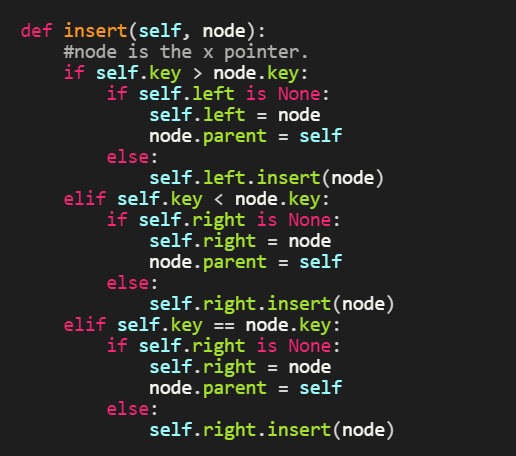

In [0]:
from IPython.display import Image
Image('insert_considering_duplicates.PNG', width=500, height=450)

I chose to use the simple solution, in which my function takes in the duplicate, skips the first *if* statement, skips the first *elif* statement, and enters the second *elif*. The function allows same keys on the right side, that is, it inserts them, unconditionally, into the right side.

# Height of BST

---

The expected height of a randomly built BST on *n* distinct keys is *O(lg n)*. The proof of this method takes more than two pages to describe. I'll paraphrase. 

In the best-case scenario, the tree is perfectly balanced. In the worst-case scenario, the tree is entirely unbalanced. The average height has been previously stated. 

First things first, define the random variables. **Xn** is the **height** of a randomly built BST on *n* keys. **Yn = 2^Xn** is the **exponential height**. **Rn** is the **rank** of the root within the set of *n* keys used to build the BST. If **Rn** = *i*, then the left subtree is a randomly-built BST on *i* - 1 keys, and the right subtree is a randomly-built BST on *n* - *i* keys.

The proof aims to show that **E[Yn]** is a polynomial in *n*, which will imply that **E[Xn] = O(lg n)**.

# BST Program in Python3

---



In [0]:
import numpy as np

class BSTNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.parent = None
           
    def insert(self, node):
        #node is the x pointer.
        if self.key > node.key:
            if self.left is None:
                self.left = node
                node.parent = self
            else:
                self.left.insert(node)
        elif self.key < node.key:
            if self.right is None:
                self.right = node
                node.parent = self
            else:
                self.right.insert(node)
        elif self.key == node.key:
            if self.right is None:
                self.right = node
                node.parent = self
            else:
                self.right.insert(node)
                              
    def height(self):
		    if self.left and self.right:
			     return 1 + max(self.left.height(), self.right.height())
		    elif self.left:
			     return 1 + self.left.height()
		    elif self.right:
			     return 1 + self.right.height()
		    else:
			     return 1
          
    def replace_node_of_parent(self, x):
        if self.parent is not None:
            if x is not None:
                x.parent = self.parent
            if self.parent.left == self:
                self.parent.left = x
            elif self.parent.right == self:
                self.parent.right = x
        else:
            self.key = x.key
            self.left = x.left
            self.right = x.right
            if x.left is not None:
                x.left.parent = self
            if x.right is not None:
                x.right.parent = self
                               
    def tree_minimum(self):
        current = self
        while current.left is not None:
            current = current.left
        return current
         
    def remove(self):
        if (self.left is not None and self.right is not None):
            successor = self.right.tree_minimum()
            self.key = successor.key
            successor.remove()
        elif self.left is not None:
            self.replace_node_of_parent(self.left)
        elif self.right is not None:
            self.replace_node_of_parent(self.right)
        else:
            self.replace_node_of_parent(None)
  
    def search(self, key):
        if self.key > key:
            if self.left is not None:
                print(self.key)
                return self.left.search(key)
            else:
                print('value %d unfound.' %key)
                return None
        elif self.key < key:
            if self.right is not None:
                print(self.key)
                return self.right.search(key)
            else:
                print('value %d unfound.' %key)
                return None
        print('value %d is in tree.' %key)
        return self
      
      
class BSTree:
    def __init__(self):
        self.root = None
                  
    def add(self, key):
        x = BSTNode(key)
        if self.root is None:
            self.root = x
        else:
            self.root.insert(x)
              
    def inorder(self, node):
        if node is not None:
            self.inorder(node.left)
            print(node.key)
            self.inorder(node.right)
    
    def postorder(self, node):
        if node is not None:
            self.postorder(node.left)
            self.postorder(node.right)
            print(node.key)
            
    def preorder(self, node):
        if node is not None:
            print(node.key)
            self.preorder(node.left)
            self.preorder(node.right)
                       
    def height(self):
		    if self.root:
			     return self.root.height()
		    else:
			     return 0
    
    def remove(self, key):
        to_remove = self.search(key)
        if (self.root == to_remove
            and self.root.left is None and self.root.right is None):
            self.root = None
        else:
            to_remove.remove()
                
    def search(self, key):
        if self.root is not None:
          return self.root.search(key)  
          
          
bstree = BSTree()
count = 0

print('Make a choice.\n')
print('Create this tree:\n >>>> create\n')
print('Verify tree height:\n >>>> height\n')
print('Insert into tree:\n >>>> insert <value>\n')
print('Delete from tree:\n >>>> delete <value>\n')
print('Search through tree:\n >>>> search <value>\n')
print('Inorder tree traversal:\n >>>> inorder\n')
print('Preorder tree traversal:\n >>>> preorder\n')
print('Postorder tree traversal:\n >>>> postorder\n')
print('Quit program:\n >>>> quit')
 
while True:
    do = input('\nChoice? ').split()
    operation = do[0].strip().lower()
    if operation == 'create':
        start = int(do[1])
        end = int(do[2])
        num = int(do[3])
        rand = np.random.randint(start,end,num)
        for i in rand:
          bstree.add(i)
    elif operation == 'height':
        count = count + 1
        print('N: %d' %num)
        print('T: %d' %count)
        print('Tree is this high:', bstree.height())
    elif operation == 'insert':
        key = int(do[1])
        bstree.add(key)
    elif operation == 'delete':
        key = int(do[1])
        bstree.remove(key)
    elif operation == 'search':
        key = int(do[1])
        bstree.search(key)
    elif operation == 'inorder':
        print('Inorder traversal:\n', end='')
        bstree.inorder(bstree.root)
        print()
    elif operation == 'preorder':
        print('Preorder traversal:\n', end='')
        bstree.preorder(bstree.root)
        print()
    elif operation == 'postorder':
        print('Postorder traversal:\n', end='')
        bstree.postorder(bstree.root)
        print()
    elif operation == 'quit':
        break